### To generate Figs. 3.8 and 3.9 we have used the parameter settings described in Sect.3.5.1. Vary the constant c (smaller and larger values) of the Chauvenet’s criterion and study the dependency of the number of detected outliers on c. Repeat this for the other three methods presented for outlier detection. Use the source code from book’s website, that generated the figures, as a starting point for the analysis.

In [206]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
import pandas as pd
from pathlib import Path
import matplotlib.dates as md
from matplotlib.dates import DateFormatter

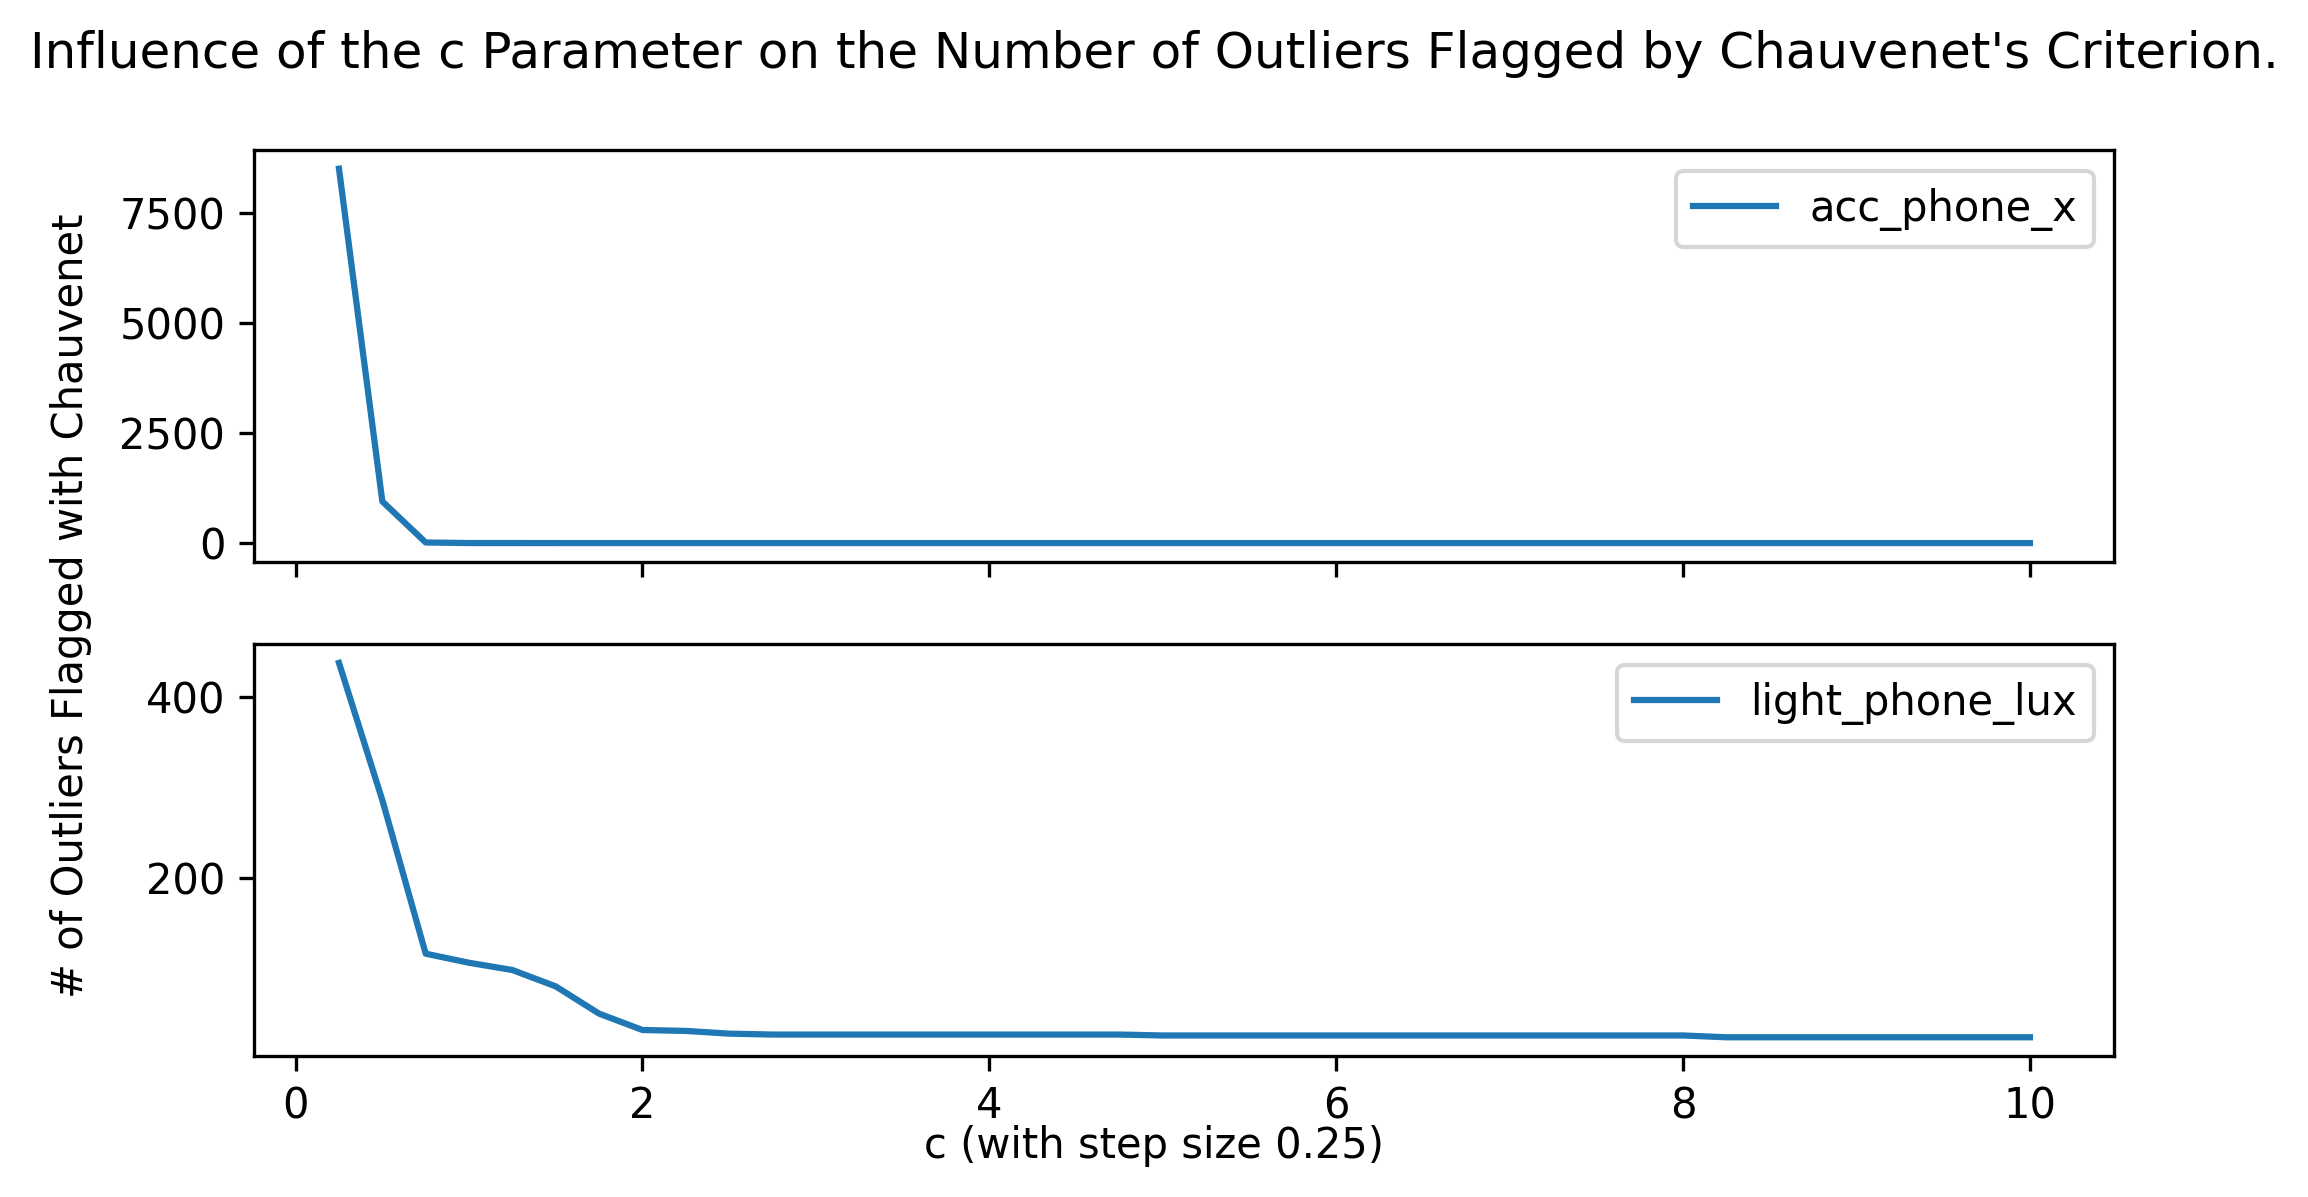

In [175]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(8, 4))
fig.suptitle('Influence of the c Parameter on the Number of Outliers Flagged by Chauvenet\'s Criterion.')
fig.text(0.5, 0.04, 'c (with step size 0.25)', ha='center')
fig.text(0.04, 0.5, '# of Outliers Flagged with Chauvenet', va='center', rotation='vertical')

# COL: acc_phone_x
c_values=[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 10.0]
n_outliers=[8509, 947, 14, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# plt.plot(c_values, n_outliers)
ax1.plot(c_values, n_outliers)
ax1.legend(['acc_phone_x'])

# COL: light_phone_lux
c_values=[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 10.0]
n_outliers=[437, 286, 117, 107, 99, 81, 51, 33, 32, 29, 28, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 25, 25, 25, 25, 25, 25, 25, 25]
# plt.plot(c_values, n_outliers)

ax2.plot(c_values, n_outliers)
ax2.legend(['light_phone_lux'])

In [3]:
ax1.legend

<bound method Axes.legend of <AxesSubplot:>>

In [20]:

_ = plt.hist(y, bins=20)

In [85]:
with open('values.pickle', 'rb') as infile:
    acc, light = pickle.load(infile)


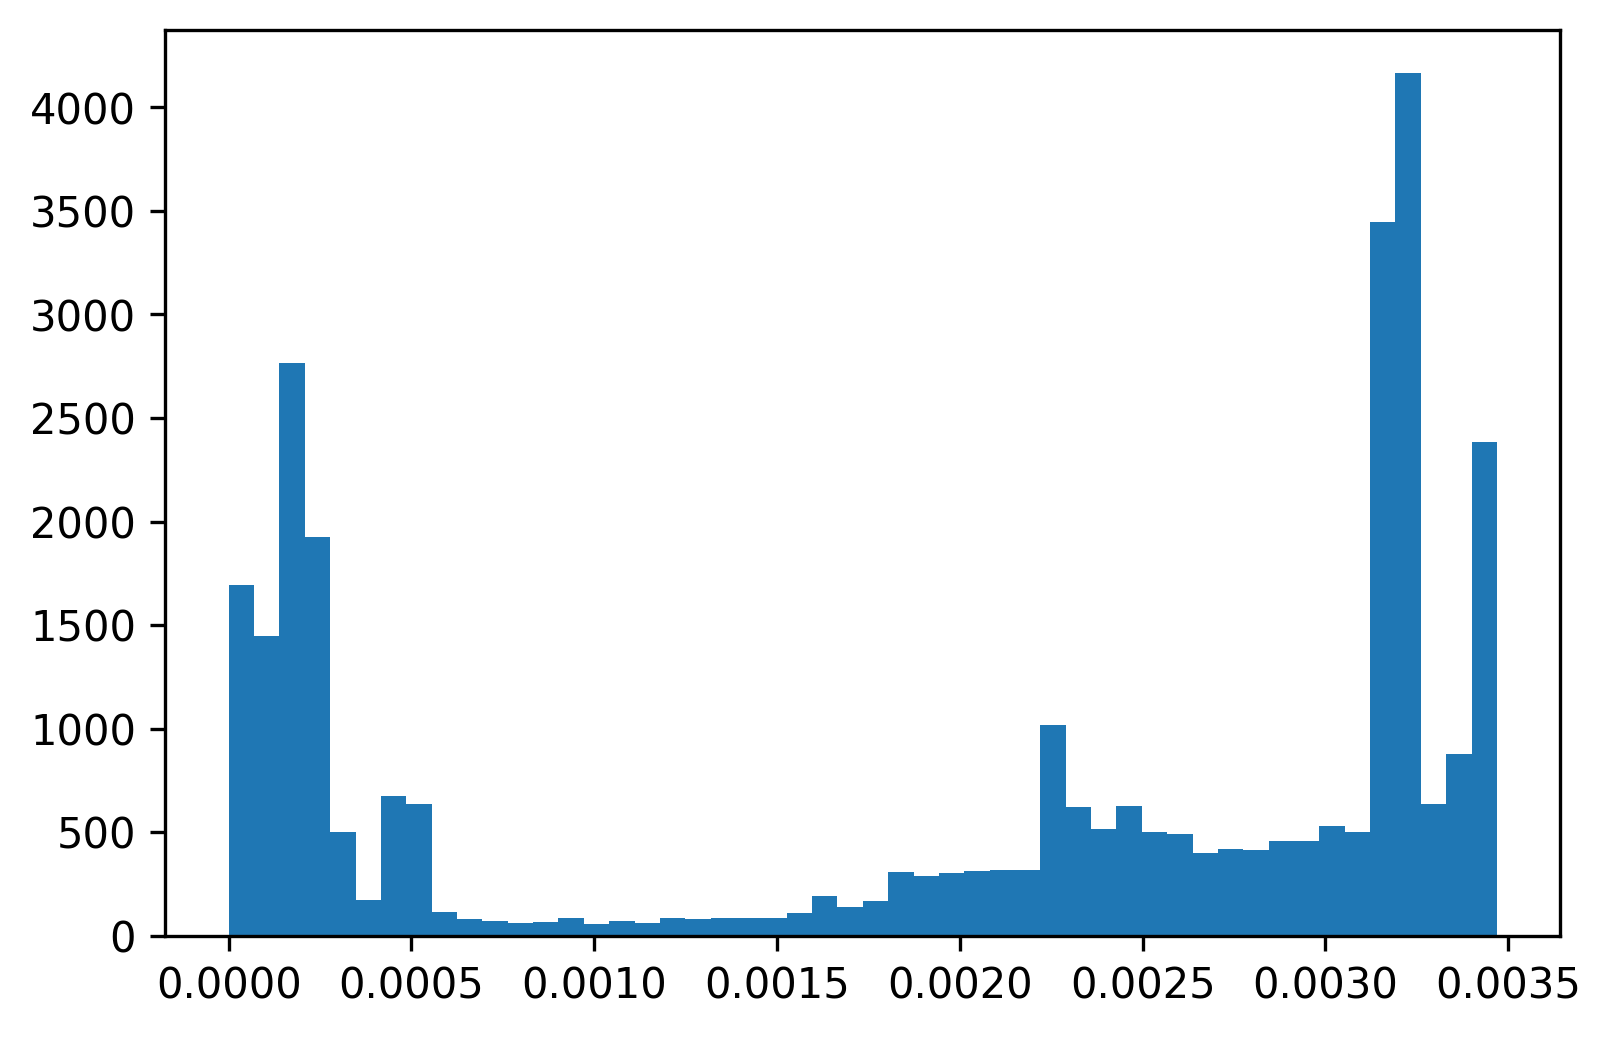

In [173]:
_ = plt.hist(acc[0], bins=50)

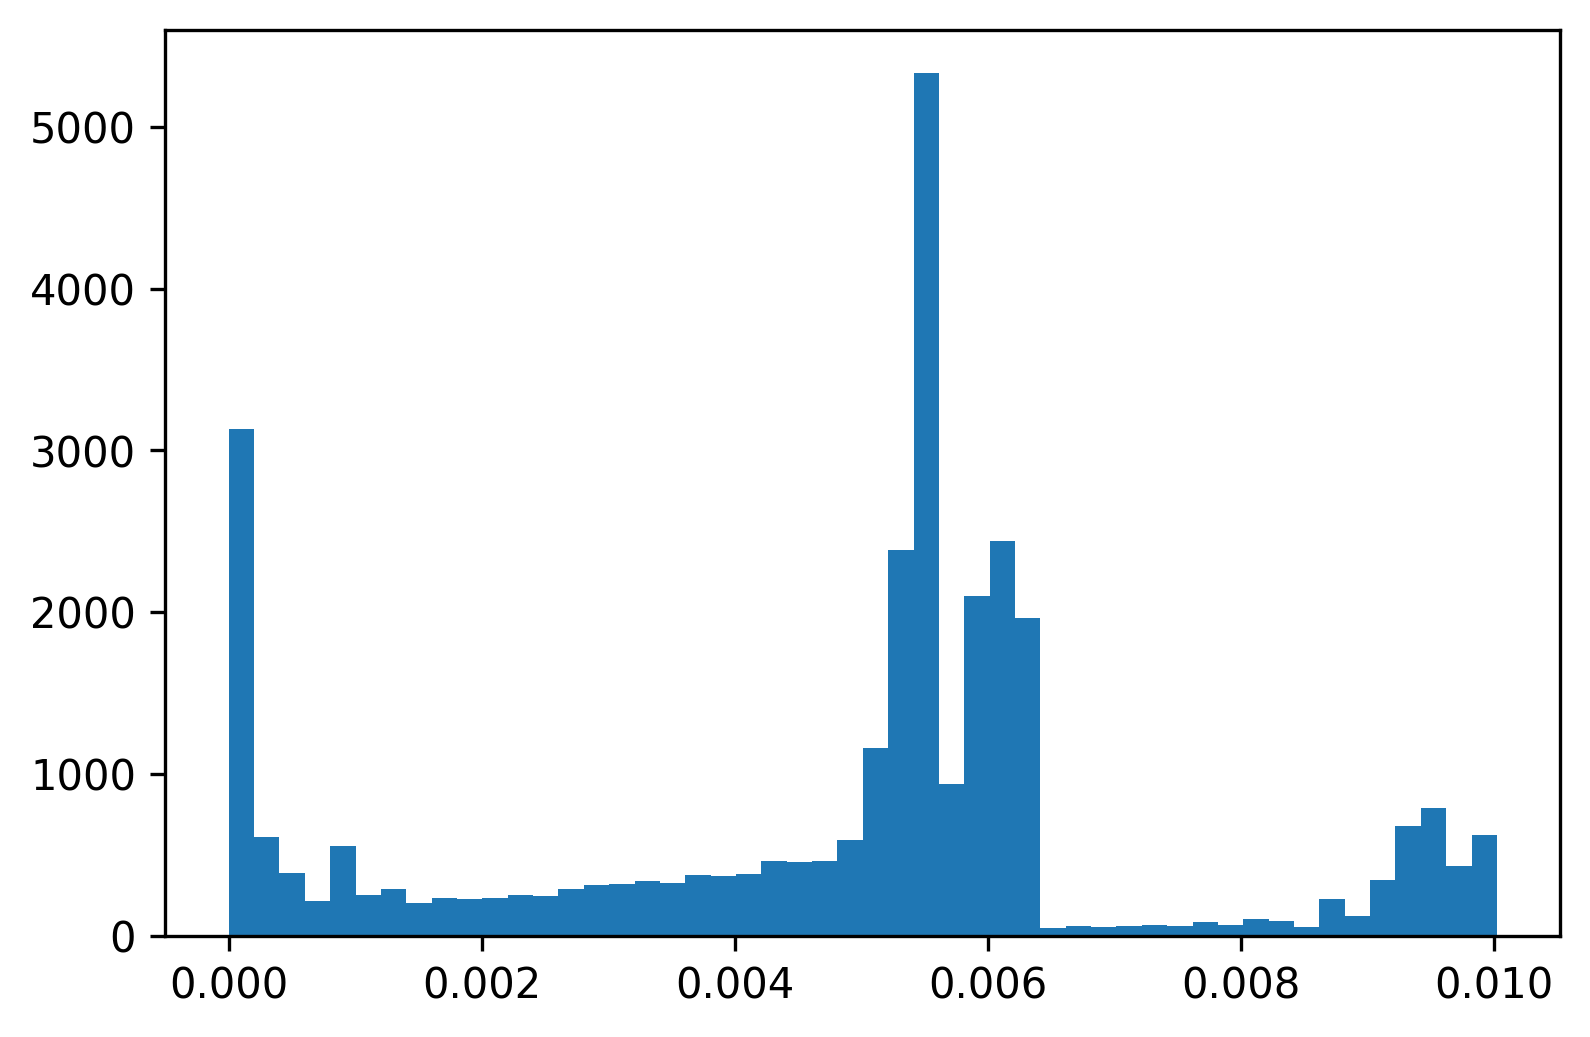

In [172]:
_ = plt.hist(acc[1], bins=50)

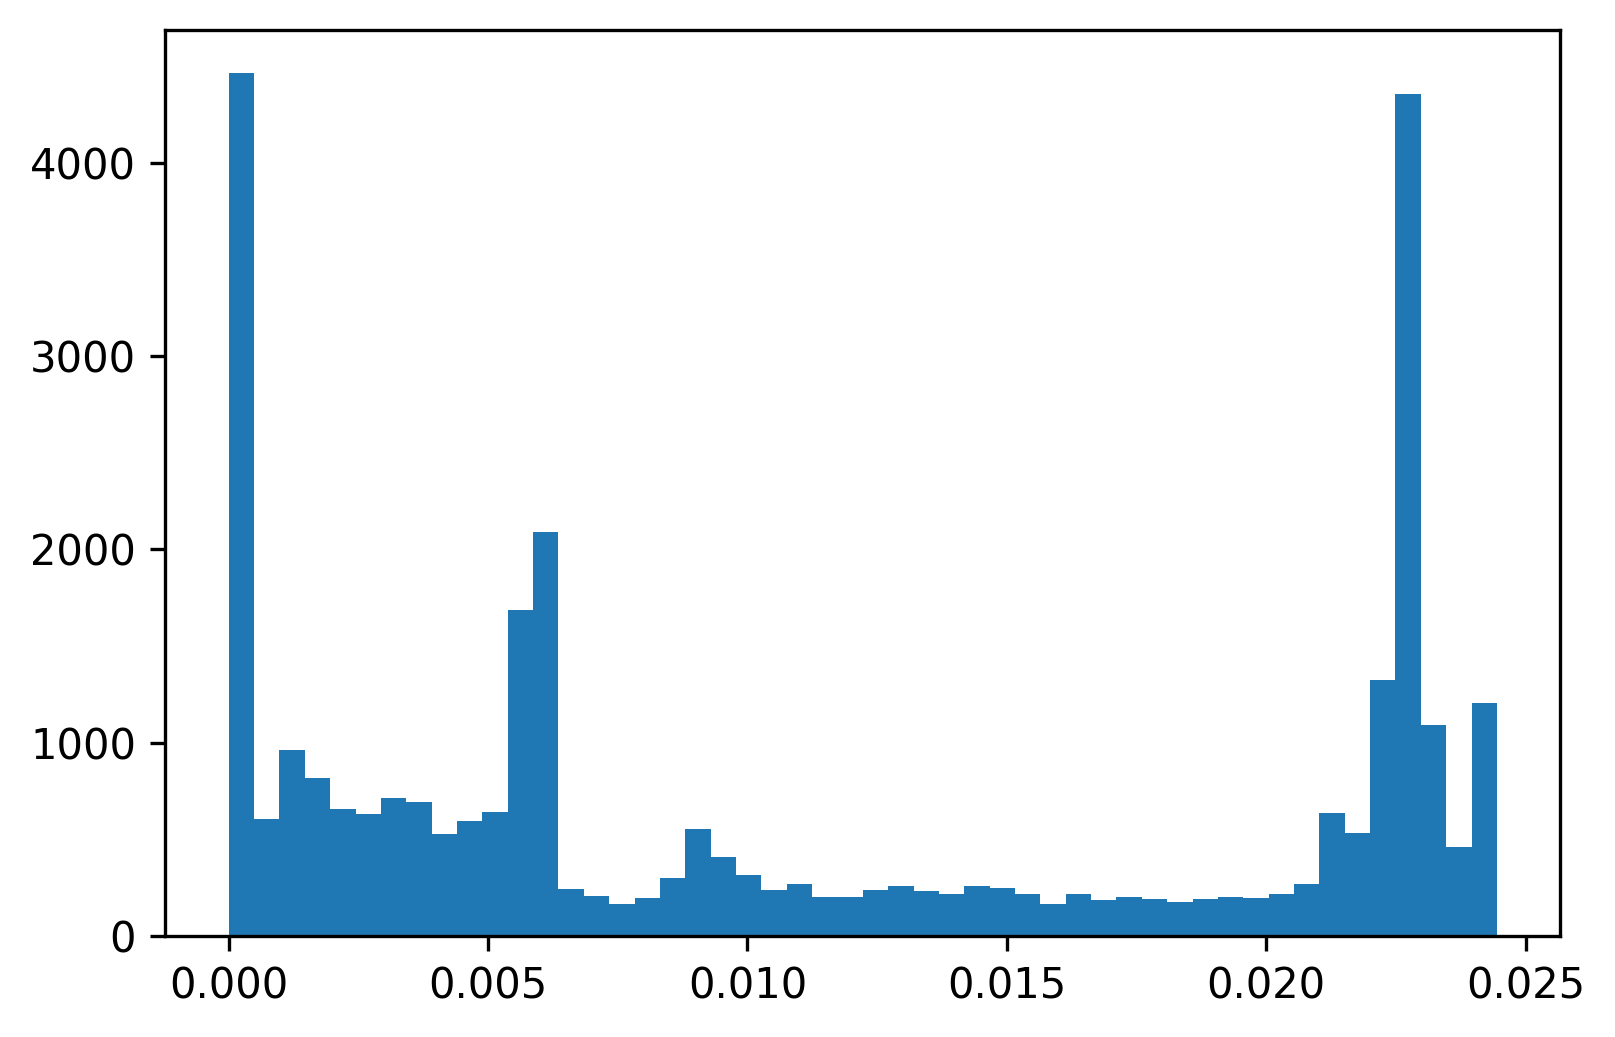

In [174]:
_ = plt.hist(acc[2], bins=50)

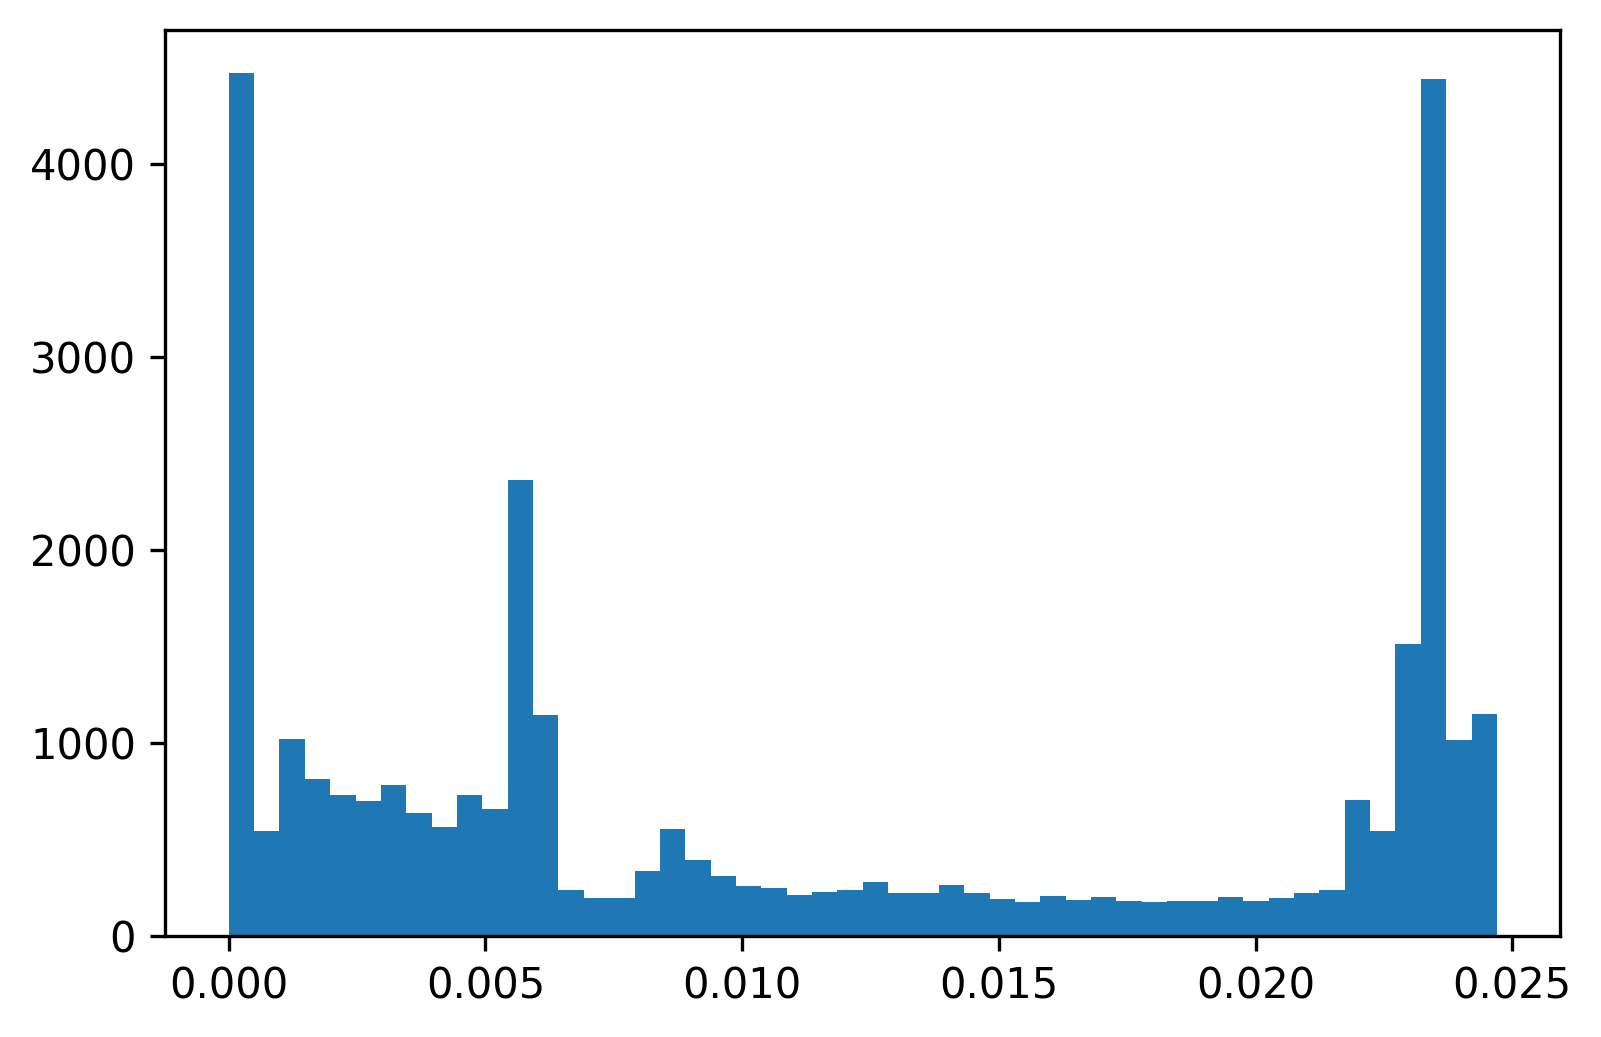

In [108]:
_ = plt.hist(acc[3], bins=50)

In [323]:
with open('distance_outliers.pickle', 'rb') as infile:
    v1, v2 = pickle.load(infile)
dmins, fmins, outliers = np.array(v1)
assert len(fmins) == len(dmins)
assert len(fmins) == len(outliers)
with open('heatmap.csv', 'w') as f:
    f.write("dmin,fmin,n_outliers\n")
    for i in range(len(fmins)):
        f.write(f"{dmins[i]},{fmins[i]},{outliers[i]}\n")

heat_data = pd.read_csv('heatmap.csv')
heat_data['outlier_percentage'] = heat_data['n_outliers'] / len(heat_data)

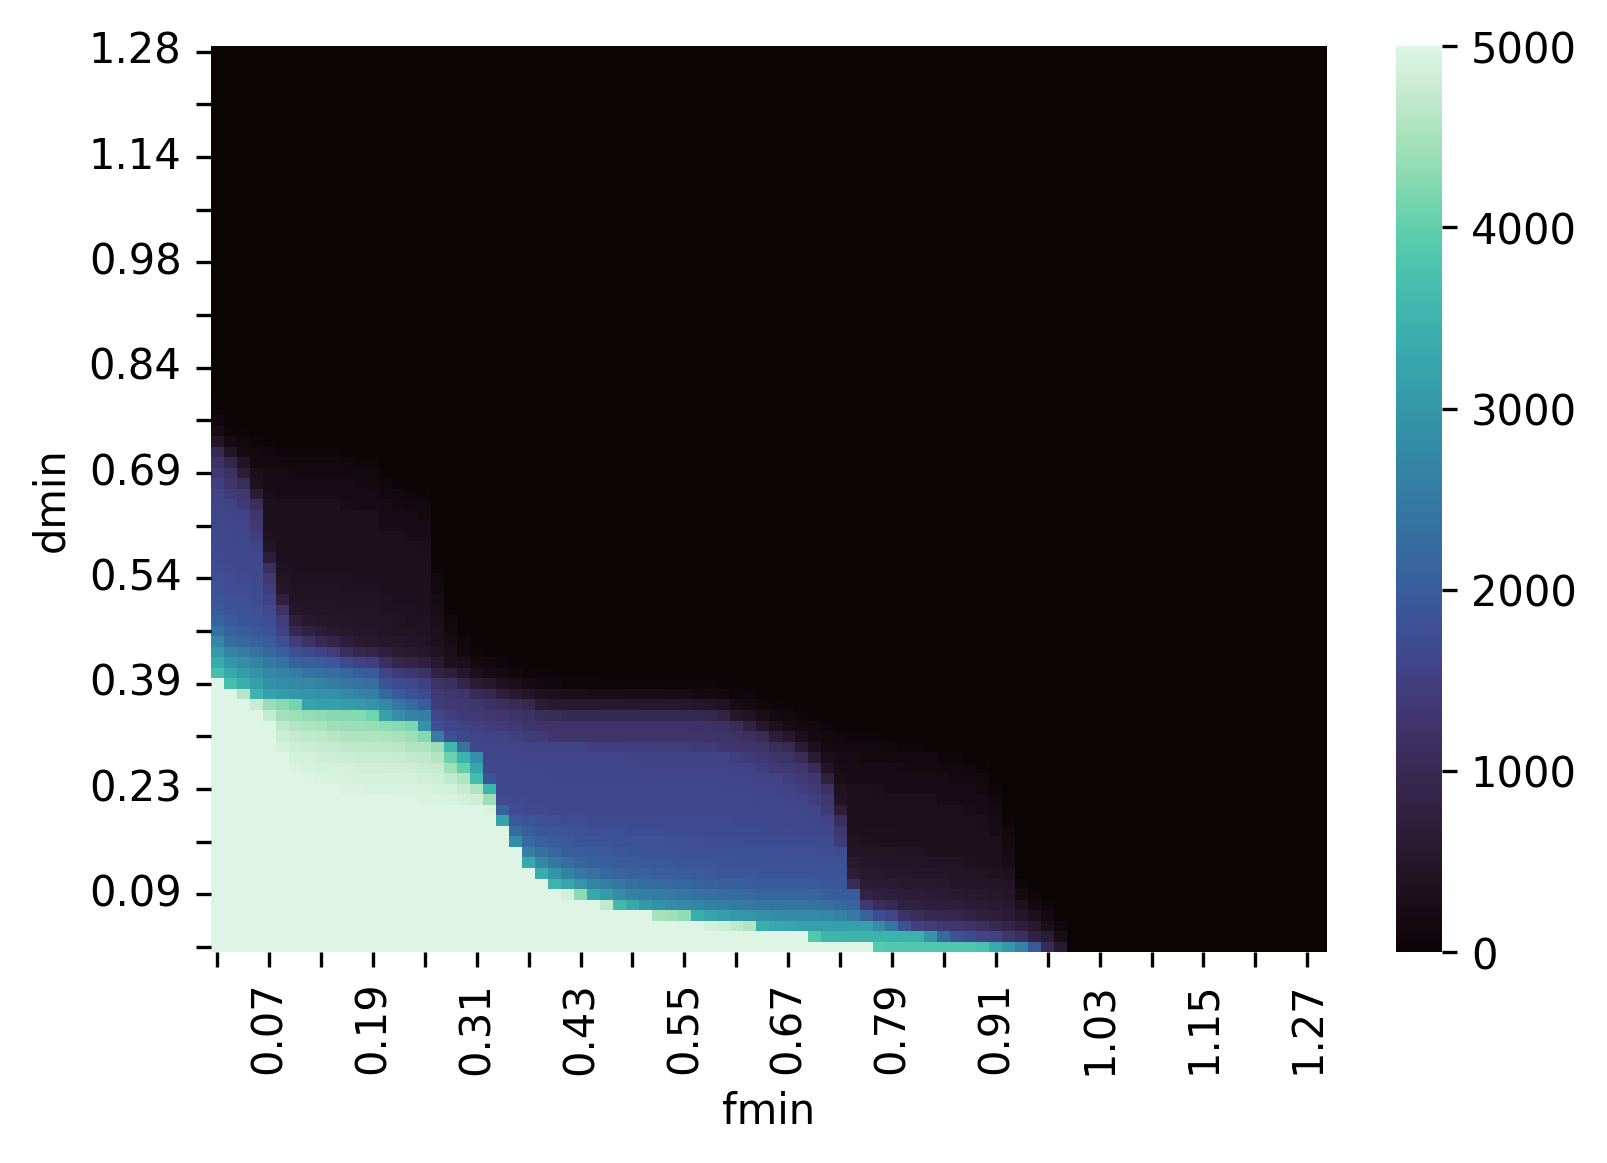

In [320]:
pivot = heat_data.pivot(index='dmin', columns='fmin', values='n_outliers')
plt.figure
ax = sns.heatmap(pivot, cmap='mako')
ax.invert_yaxis()

fmt = '{:0.2f}'
xticklabels = []
for index, item in enumerate(ax.get_xticklabels()):
    item.set_text(fmt.format(float(item.get_text())))
    xticklabels += [item]
    if index % 2 == 0:
        item.set_visible(False)
yticklabels = []
for index, item in enumerate(ax.get_yticklabels()):
    item.set_text(fmt.format(float(item.get_text())))
    yticklabels += [item]
    if index % 2 == 0:
        item.set_visible(False)
ax.set_xticklabels(xticklabels)
ax.set_yticklabels(yticklabels)
s=1

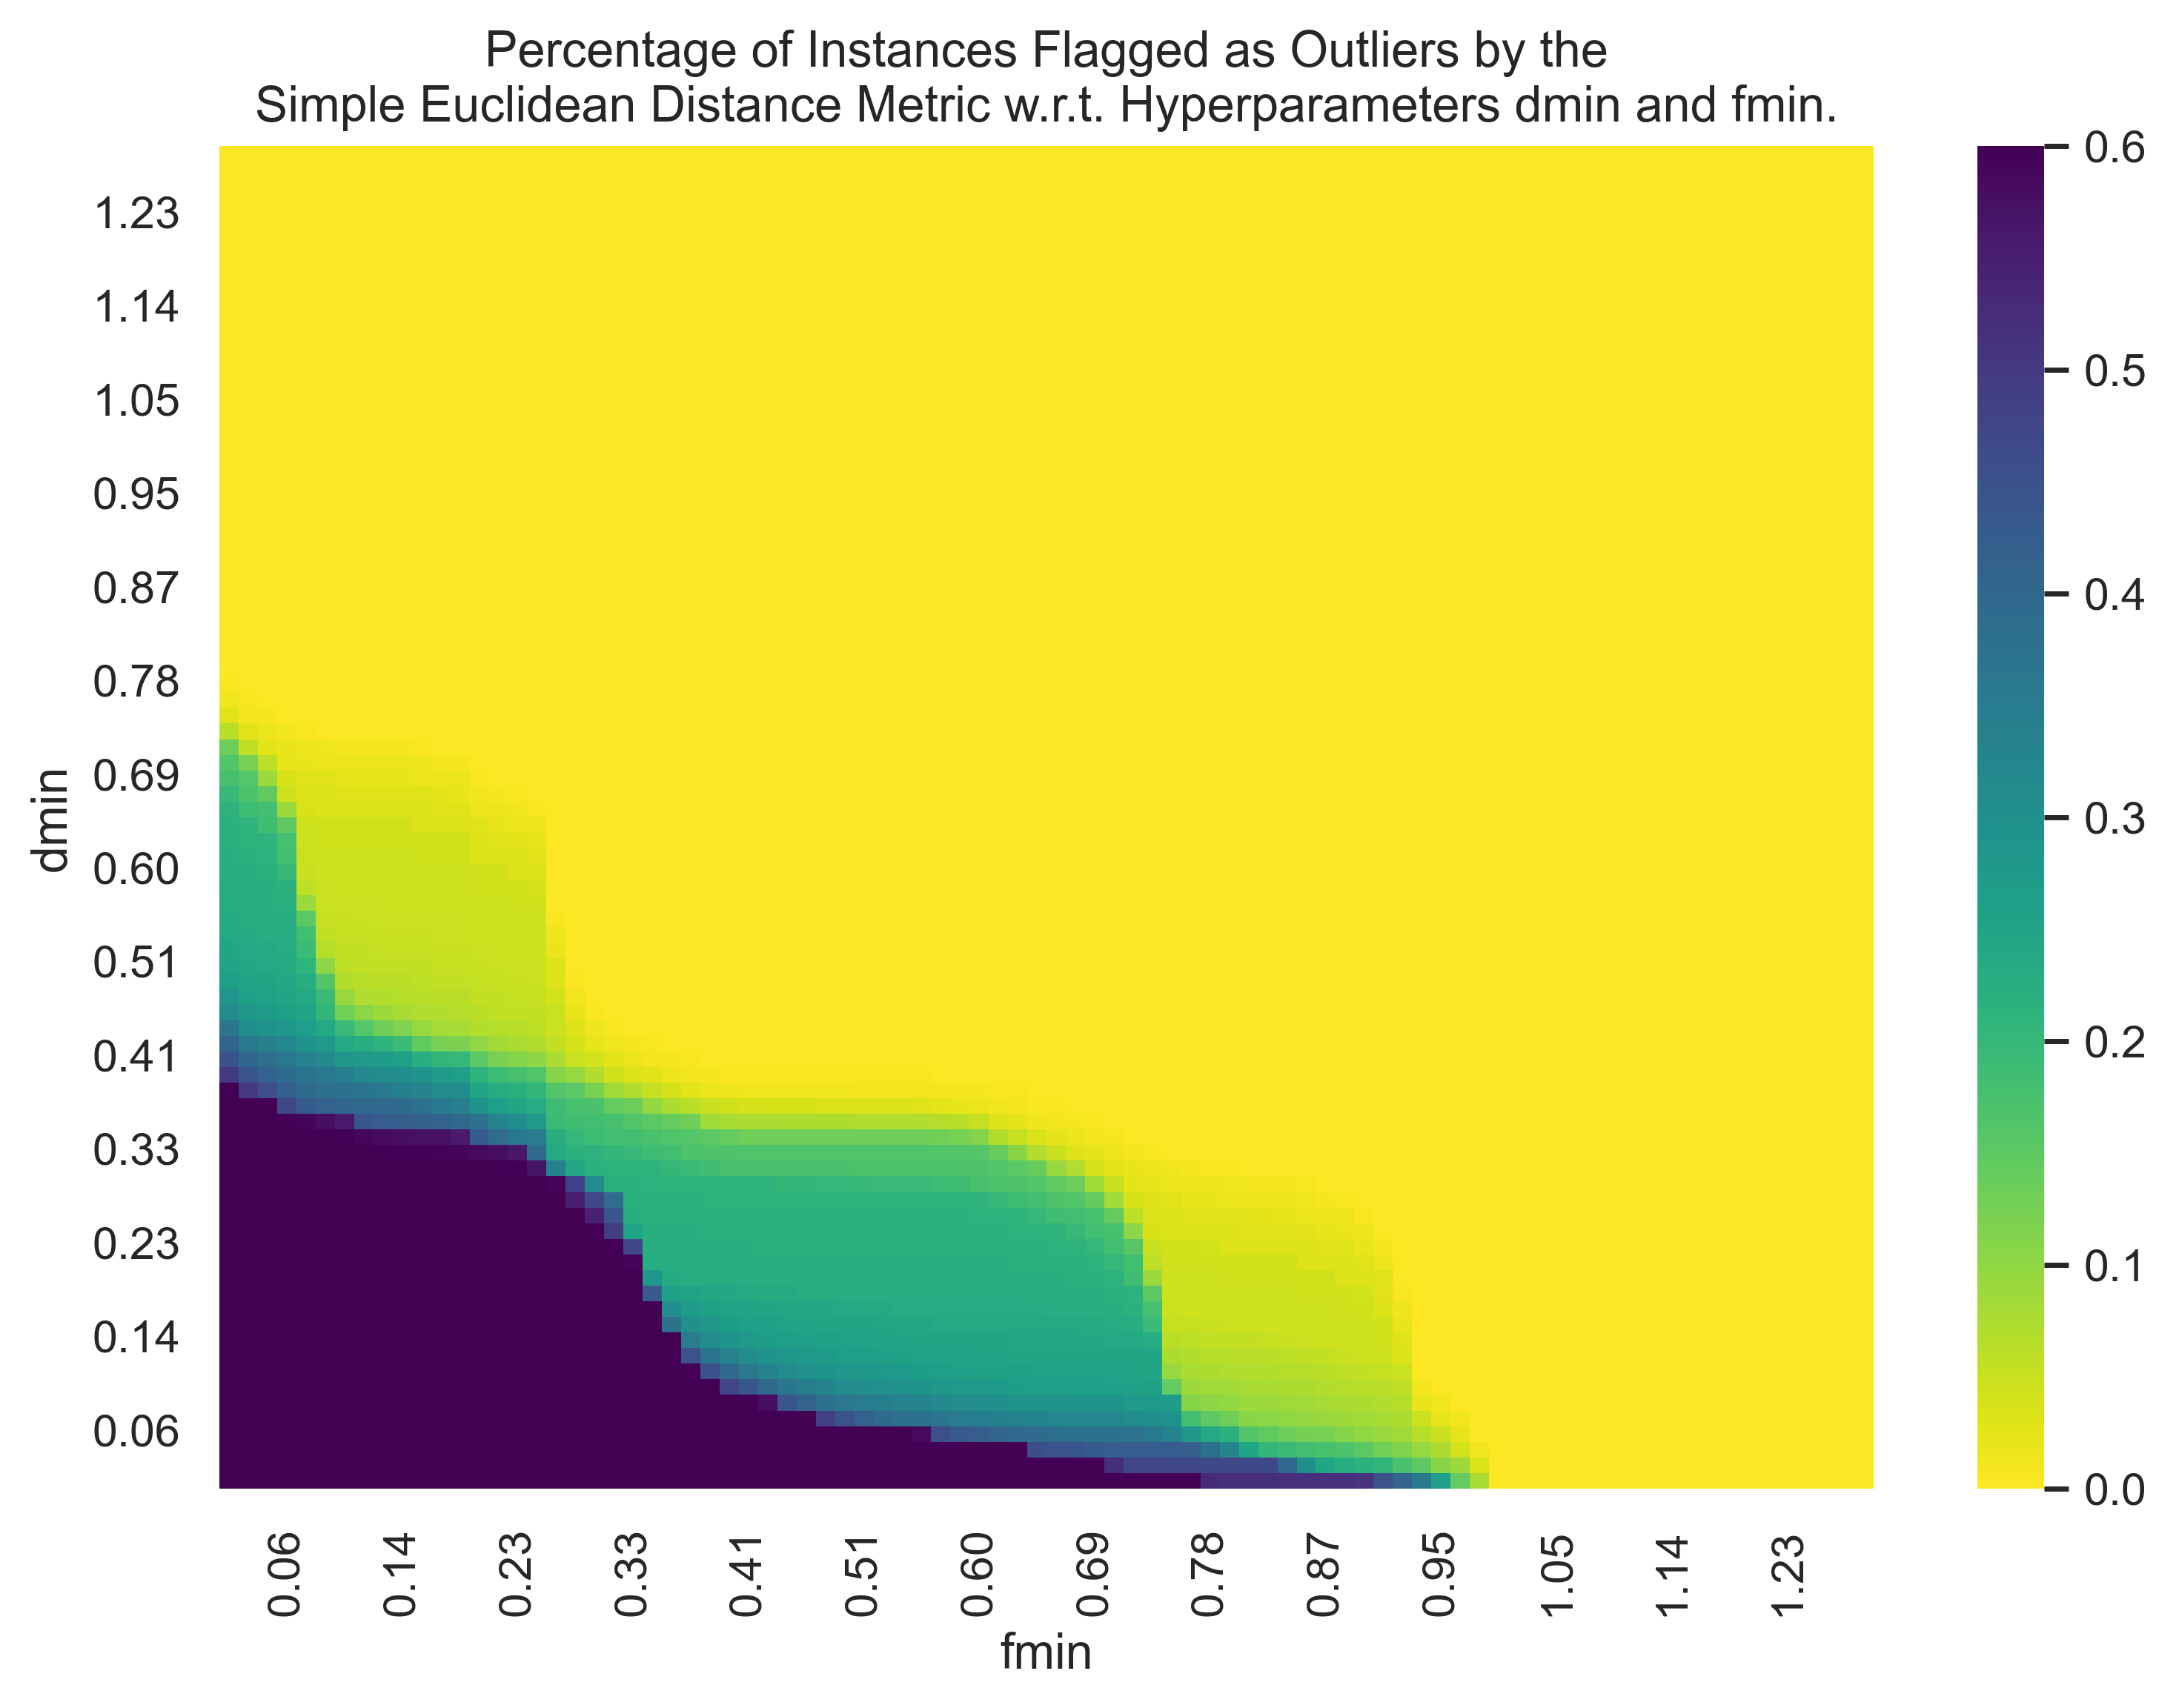

In [378]:
pivot = heat_data.pivot(index='dmin', columns='fmin', values='outlier_percentage')
#sns.set(rc={"figure.figsize":(4, 3)})
plt.figure(figsize=(9, 6), dpi=400)
ax = sns.heatmap(pivot, cmap='viridis_r', vmin=0, vmax=0.6)
ax.invert_yaxis()



fmt = '{:0.2f}'
xticklabels = []
for index, item in enumerate(ax.get_xticklabels()):
    item.set_text(fmt.format(float(item.get_text())))
    xticklabels += [item]
    if index % 2 == 0:
        item.set_visible(False)
yticklabels = []
for index, item in enumerate(ax.get_yticklabels()):
    item.set_text(fmt.format(float(item.get_text())))
    yticklabels += [item]
    if index % 2 == 0:
        item.set_visible(False)
ax.set_xticklabels(xticklabels)
ax.set_yticklabels(yticklabels)
ax.set_title('Percentage of Instances Flagged as Outliers by the\nSimple Euclidean Distance Metric w.r.t. Hyperparameters dmin and fmin.', size=12)
s=1

In [289]:
dmins, fmins, outliers = v1
scale = 4

dmins = dmins[:(len(dmins) // scale)-1]
fmins = fmins[:(len(fmins) // scale)-1]
outliers_wow = outliers[:(len(outliers) // scale)-1]


dwow = np.unique(np.array(dmins))
fwow = np.unique(np.array(fmins))
X,Y = np.meshgrid(dwow,fwow)

Z=np.array(outliers_wow).reshape(len(dwow),len(fwow), )

plt.figure(figsize=(3,3), dpi=150)
plt.pcolormesh(X,Y,Z)

plt.show()


ValueError: cannot reshape array of size 1848 into shape (22,86)

In [260]:
dmins, fmins, outliers = v2
dmins = dmins[:len(dmins)//3]
fmins = fmins[:len(dmins)//3]
outliers = outliers[:len(dmins)//3]

dmins=np.unique(np.array(dmins))
fmins=np.unique(np.array(fmins))
X,Y = np.meshgrid(dmins,fmins)

Z=np.array(outliers).reshape(len(dmins),len(fmins))

plt.figure(figsize=(8,8), dpi=300)
plt.pcolormesh(X,Y,Z)
plt.show()

ValueError: cannot reshape array of size 821 into shape (29,86)

In [151]:
len(np.arange(0.01, 1, 0.01)) **2

9801

In [171]:
params = len(np.arange(0.01, 1.3, 0.015))
runs = (params **2 )
seconds = runs * 3.5
mins = seconds / 60
(mins / 60) * 2

14.381111111111112

In [322]:
len(heat_data)

7396

# 3. Imputing Heart Rate

In [183]:
# Set up file names and locations.
DATA_PATH = Path("./intermediate_datafiles/")
DATASET_FNAME = "chapter2_result.csv"
RESULT_FNAME = "chapter3_result_outliers.csv"
dataset = pd.read_csv(Path(DATA_PATH / DATASET_FNAME), index_col=0)
dataset.index = pd.to_datetime(dataset.index)

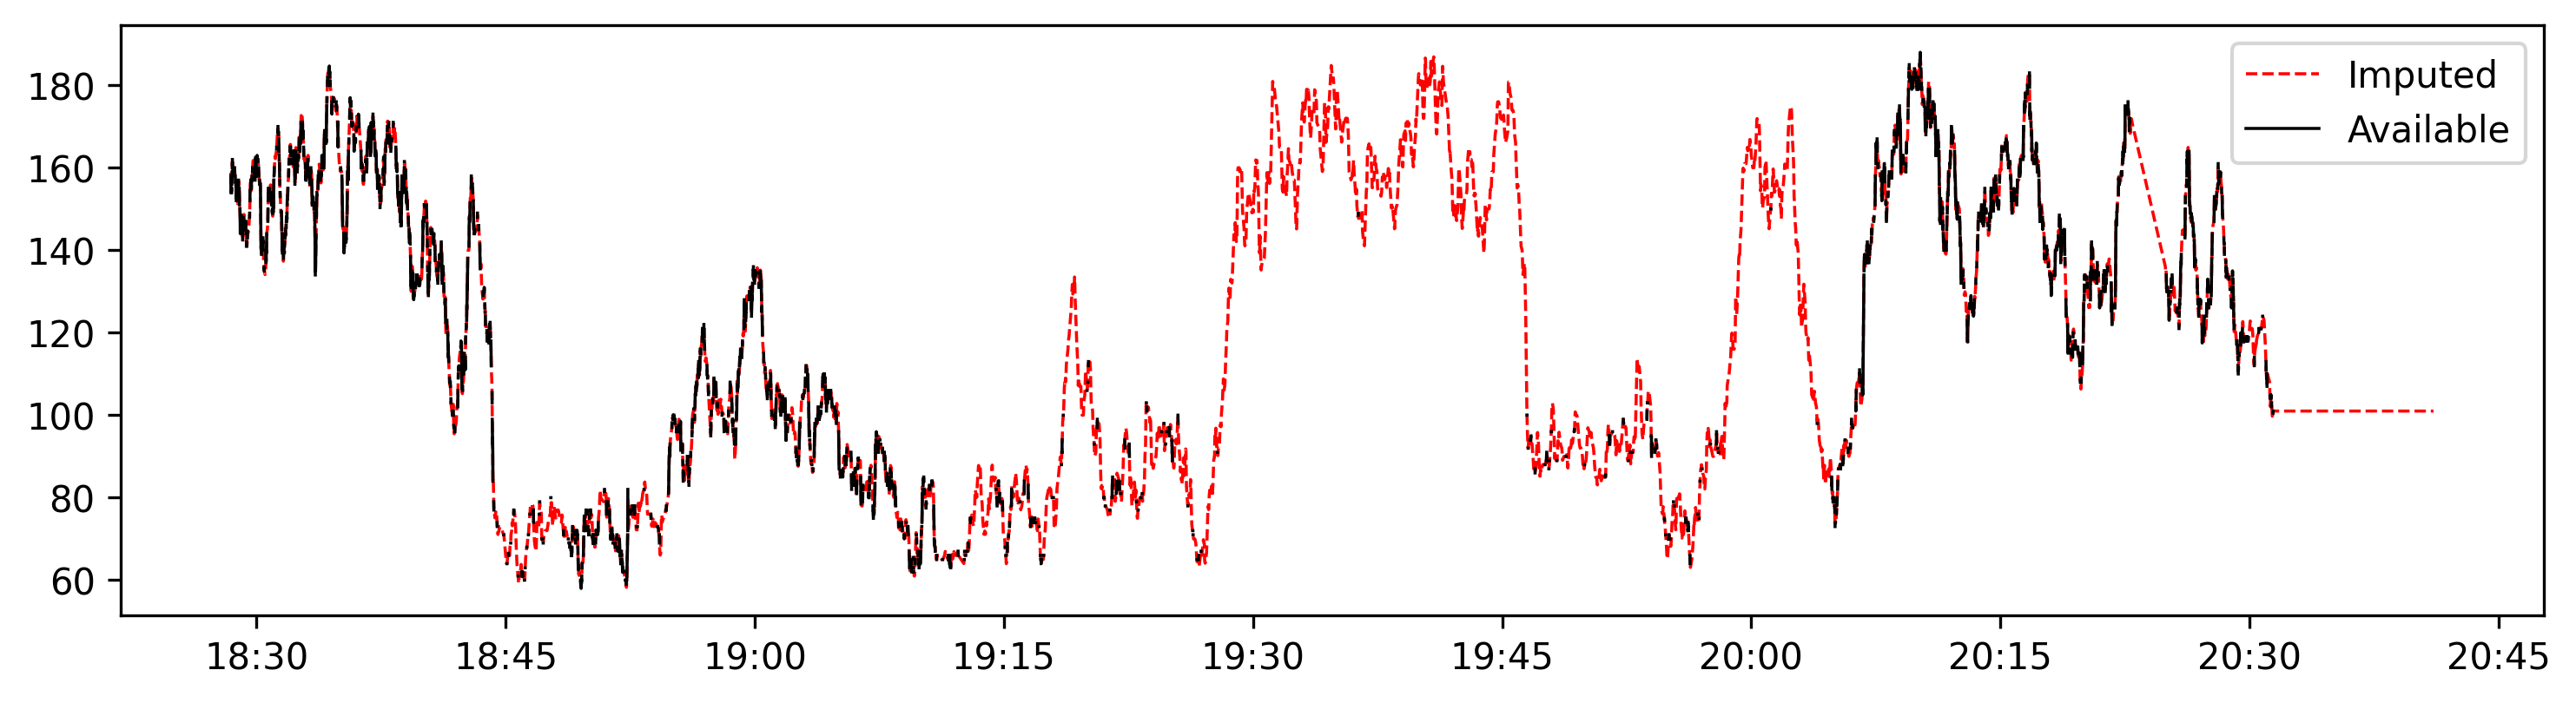

In [251]:
heart_rate = dataset['hr_watch_rate']
figg, ax11 = plt.subplots(1, sharex=True, figsize=(12,  3))

date_form = DateFormatter("%H:%M")


x_interpolated = dataset.index[heart_rate.isna()]
y_interpolated = heart_rate.interpolate()[heart_rate.isna()]


ax11.plot(x_interpolated, y_interpolated, 'r--', lw=0.85)
ax11.plot(dataset.index, heart_rate, 'k', lw=0.85)



#ax22.xaxis.set_major_locator(md.MinuteLocator(byminute = [0, 30]))
ax11.xaxis.set_major_formatter(date_form)
ax11.legend(['Imputed', 'Available'])

In [189]:
min(dataset.index)

Timestamp('2016-02-08 18:28:25.656222395')

In [190]:
max(dataset.index)

Timestamp('2016-02-08 20:41:04.906222395')

In [199]:
dataset['hr_watch_rate'].interpolate()

2016-02-08 18:28:25.656222395      NaN
2016-02-08 18:28:25.906222395      NaN
2016-02-08 18:28:26.156222395      NaN
2016-02-08 18:28:26.406222395      NaN
2016-02-08 18:28:26.656222395      NaN
                                 ...  
2016-02-08 20:41:03.906222395    101.0
2016-02-08 20:41:04.156222395    101.0
2016-02-08 20:41:04.406222395    101.0
2016-02-08 20:41:04.656222395    101.0
2016-02-08 20:41:04.906222395    101.0
Name: hr_watch_rate, Length: 31838, dtype: float64

In [381]:
heat_data.describe()

,dmin,fmin,n_outliers,outlier_percentage
count,7396.000000,7396.000000,7396.000000,7396.000000
mean,0.647500,0.647500,616.991076,0.083422
std,0.372391,0.372391,1418.788779,0.191832
min,0.010000,0.010000,0.000000,0.000000
25%,0.325000,0.325000,0.000000,0.000000
50%,0.647500,0.647500,0.000000,0.000000
75%,0.970000,0.970000,118.000000,0.015955
max,1.285000,1.285000,5000.000000,0.676041
